# Hotel Booking EDA Analysis
In this project, we are interested in studying the hotel booking and cancelations.

In this notebook, topic covered are as followed:
- Where do the guests come from?
- How much do guests pay for a room per night?
- How does the price per night vary over the year?
- Which are the most busy month?
- How long do people stay at the hotels?
- Bookings by market segment
- How many bookings were canceled?
- Which month have the highest number of cancelations?

# Data Description:
This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.
- comprised of 32 columns

source: https://www.kaggle.com/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations 

In [1]:
# link with drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation and Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/drive/Shareddrives/whs(shared drive)/Datasets/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Replace missing values:  
- agent: If no agency is given, booking was most likely made without one.
- company: If none given, it was most likely private.
- rest should be self-explanatory.

In [9]:
nan_replacements = {"children:": 0,"country": "Unknown", "agent": 0, "company": 0}
df_cln = df.fillna(nan_replacements)

In [10]:
df_cln.fillna(0,inplace=True)

In [11]:
df_cln.isnull().values.any()

False

In [12]:
# "meal" contains values "Undefined", which is equal to SC.
df_cln["meal"].replace("Undefined", "SC", inplace=True)

In [13]:
# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# filter out those wrong entries where no guest
filter=(df_cln['children']==0) & (df_cln['adults']==0) & (df_cln['babies']==0)
data = df_cln[~filter] # ~ means negation as we only interested into those with customer staying
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [ ]:
# convert Date/Time into correct format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'],format="%m/%d/%Y")
data

<ipython-input-65-0adec74e55bb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Spatial Analysis
- Where do the guests come from?

In [17]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [14]:
# separate data according to the hotel type
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

In [15]:
# get number of acutal guests by country
country_data = pd.DataFrame(data[data["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

In [18]:
# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [19]:
# show on map
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

- From this analysis, we observe that people from all over the world
- Most guests are from Portugal and other countries in Europe

## How much do guests pay for a room per night?

- Both hotels have different room types and different meal arrangements. 
- Seasonal factors are also important. So the prices vary a lot. 
- Since no currency information is given, but Portugal is part of the European Monetary Union, so in this study we assume that all prices are in EUR.

In [20]:
# only take those without cancellation
data2=data[data['is_canceled']==0]

In [23]:
# Counting adults and children as paying guests only, not babies.
resort.loc["adr_pp"] = resort["adr"] / (resort["adults"] + resort["children"])
city.loc["adr_pp"] = city["adr"] / (city["adults"] + city["children"])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
print("""From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(resort["adr_pp"].mean(), city["adr_pp"].mean()))

From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.49 € per night and person.
City hotel: 59.27 € per night and person.


- this shows that on average the price for city hotel is normally higher than resort hotel

In [27]:
# normalize price per night (adr):
data2.loc["adr_pp"] = data2["adr"] / (data2["adults"] + data2["children"])
room_prices = data2[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



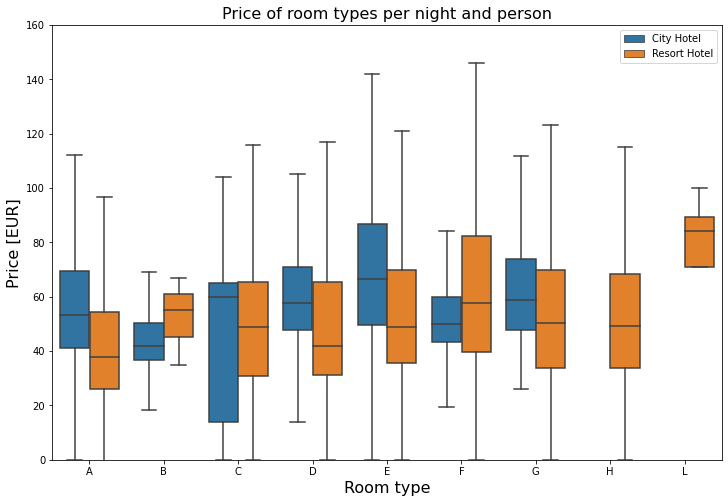

In [30]:
# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

- This figure shows the average price per room, depending on its type and the standard deviation. 
- Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

## How does the price per night vary over the year?

In [45]:
# group the data by their arrival date_month for both resort and city hotel
resort_hotel=resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

# merge the data on the arrival date and month
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel'] # we need to compare the price for both the hotels
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [35]:
# install packages for sorting the months
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=8c4afcc98959822d3876261479eb985944e551d384d5eac8c65b6aa5c64cfec4
  Stored in directory: /root/.cache/pip/wheels/f8/84/15/465a1c7eabab8605e82621b7aa658c99010f3564a43ccd06aa
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3246 sha256=8db42224373b8df67a0f8788ef0cd672feed2590360d22b08d11ac783d637b27
  Stored in directory: /root/.cache/pip/wheels/9a/0d/2e/309df76f445367ea1777b73df0feb347b9c8d204ead35fdb10
Successfully built sorted-months-weekdays


In [36]:
import sort_dataframeby_monthorweek as sd

In [46]:
# sort the month into correct order
final=sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [59]:
fig = px.line(final, x='month', y=['price_for_resort','price_for_city_hotel'], title='Room price per night over the months')

fig.update_layout(
    title='Room price per night over the months',
    xaxis_title="Months",
    yaxis_title="Price [EUR]",
    legend_title="Hotel price",
)

fig.show()

- This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here).
- The price of the city hotel varies less and is most expensive during spring and autumn.

## Which are the most busy month or in which months Guests are high?

In [61]:
rush_resort=resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [62]:
rush_city=city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [63]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no of guests in resort','no of guest in city hotel']
final_rush

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [64]:
final_rush=sd.Sort_Dataframeby_Month(df=final_rush,monthcolumnname='month')
final_rush

,month,no of guests in resort,no of guest in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [ ]:
final_rush.columns

Index(['month', 'no of guests in resort', 'no of guest in city hotel'], dtype='object')

In [66]:
fig = px.line(data_frame=final_rush, x='month', y=['no of guests in resort','no of guest in city hotel'])

fig.update_layout(
    title='Total number of guests per months',
    xaxis_title="Months",
    yaxis_title="No. of guests",
    legend_title="Hotel type",
)

fig.show()

- The City hotel has more guests during spring and autumn, where the prices are also highest.
- In July and August there are less visitors, although prices are lower.
- Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
- Both hotels have the fewest guests during the winter.

## How long do people stay at the hotels?

In [73]:
clean_data = data[data['is_canceled']==0]

clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

<ipython-input-73-4005abff4037>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [77]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [78]:
stay=stay.rename(columns={'is_canceled':'Number of stays'}) # the column is_canceled is the count of the section = no. of stays for that section
stay.head()

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


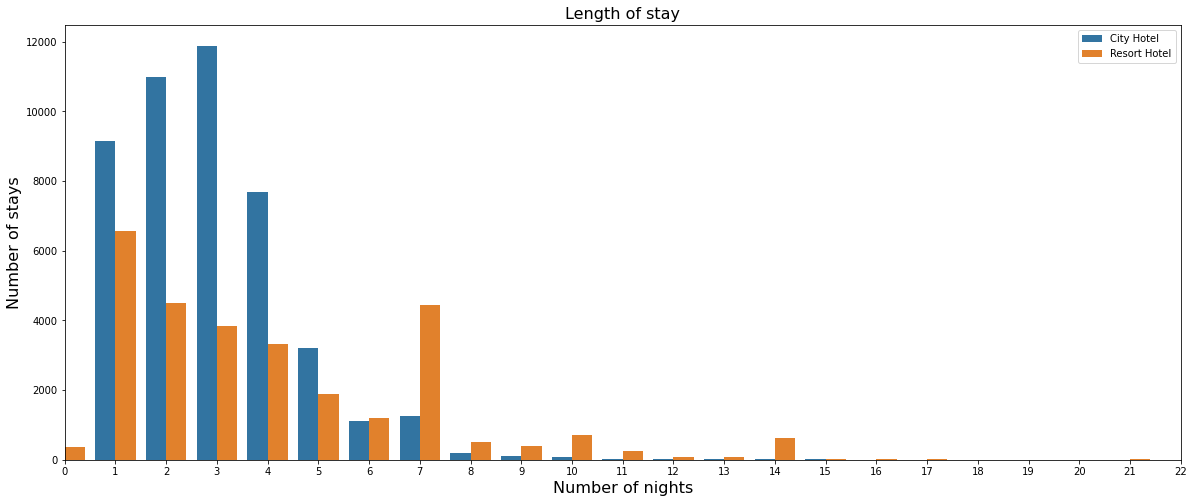

In [82]:
plt.figure(figsize=(20, 8))
sns.barplot(x = "total_nights", y = "Number of stays" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=stay)
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Number of stays", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

- For the city hotel there is a clear preference for 1-4 nights.
- For the resort hotel, 1-4 nights are also often booked, but 7 nights also stand out as being very popular.

## Bookings by market segment

In [83]:
clean_data['market_segment'].value_counts()

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

In [84]:
# pie plot
fig=px.pie(clean_data,
             values=clean_data['market_segment'].value_counts().values,
             names=clean_data['market_segment'].value_counts().index,
             title="Bookings per market segment")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

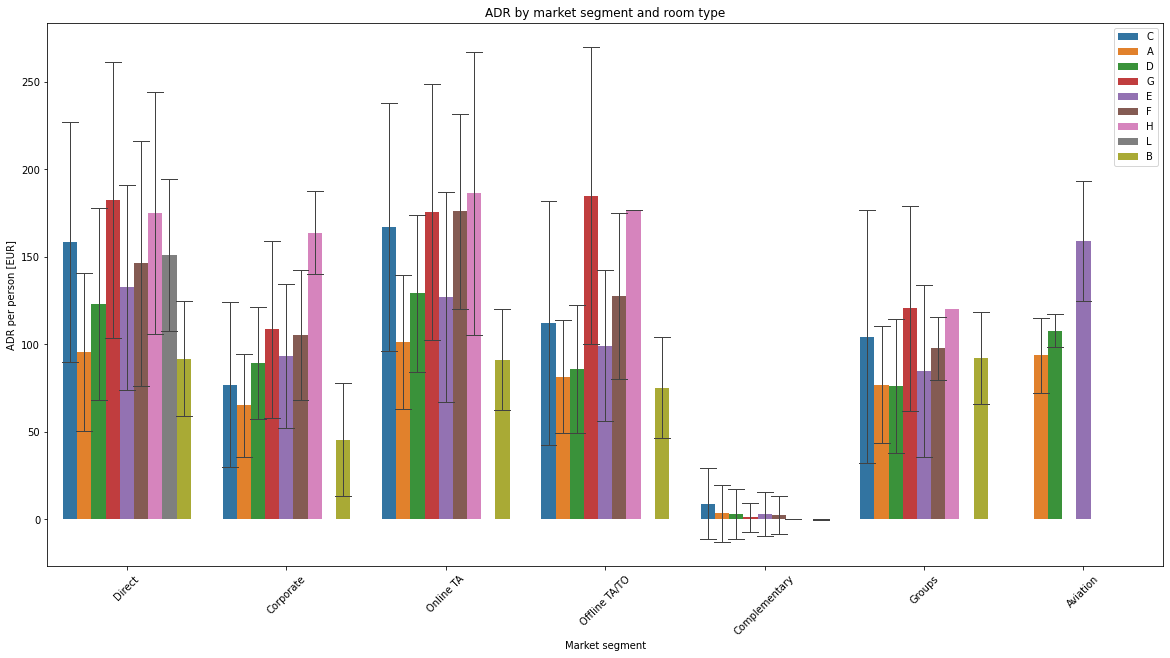

In [87]:
# price per night (ADR) and person based on booking and room
plt.figure(figsize=(20, 10))
sns.barplot(x="market_segment",
            y="adr",
            hue="reserved_room_type",
            data=clean_data,
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.title("ADR by market segment and room type")
plt.xlabel("Market segment")
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]")
plt.legend(loc="upper right")
plt.show()

## How many bookings were cancelled?

In [88]:
cancel=data[data['is_canceled']==1]

In [89]:
resort_cancel = cancel[cancel["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_cancel = cancel[cancel["hotel"] == "City Hotel"]["is_canceled"].sum()

In [90]:
resort_cancel

11120

In [91]:
city_cancel

33079

In [93]:
# convert entire stats into percentage
px.pie(values=[11120,33079],names=[resort_cancel,city_cancel])

## Which month have the highest number of cancellations?

In [100]:
cancel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0.0,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0.0,0,Transient,107.0,0,2,Canceled,5/11/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,0.0,0.0,0,Transient,108.3,0,2,Canceled,5/29/2015


In [108]:
cancel_month=cancel.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled=cancel_month.iloc[:,0:3]
cancelled=cancelled.rename(columns={'is_canceled':'no_of_cancellations'})

total=data.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
total_booking=total.iloc[:,0:3]
total_booking=total_booking.rename(columns={'is_canceled':'total_booking'})

cancelled["cancel_percent"] = cancelled["no_of_cancellations"] / total_booking["total_booking"] * 100
cancelled

,arrival_date_month,hotel,no_of_cancellations,cancel_percent
0,April,City Hotel,3459,46.311421
1,April,Resort Hotel,1059,29.343308
2,August,City Hotel,3600,40.147206
3,August,Resort Hotel,1637,33.449121
4,December,City Hotel,1737,42.221682
5,December,Resort Hotel,631,23.856333
6,February,City Hotel,1899,38.363636
7,February,Resort Hotel,794,25.596389
8,January,City Hotel,1481,39.705094
9,January,Resort Hotel,325,14.833409


In [111]:
# sort the month into correct order
cancelled_sorted=sd.Sort_Dataframeby_Month(cancelled,monthcolumnname='arrival_date_month')
cancelled_sorted

,arrival_date_month,hotel,no_of_cancellations,cancel_percent
0,January,City Hotel,1481,39.705094
1,January,Resort Hotel,325,14.833409
2,February,City Hotel,1899,38.363636
3,February,Resort Hotel,794,25.596389
4,March,City Hotel,2385,37.068698
5,March,Resort Hotel,763,22.885423
6,April,City Hotel,3459,46.311421
7,April,Resort Hotel,1059,29.343308
8,May,City Hotel,3653,44.434984
9,May,Resort Hotel,1024,28.772127


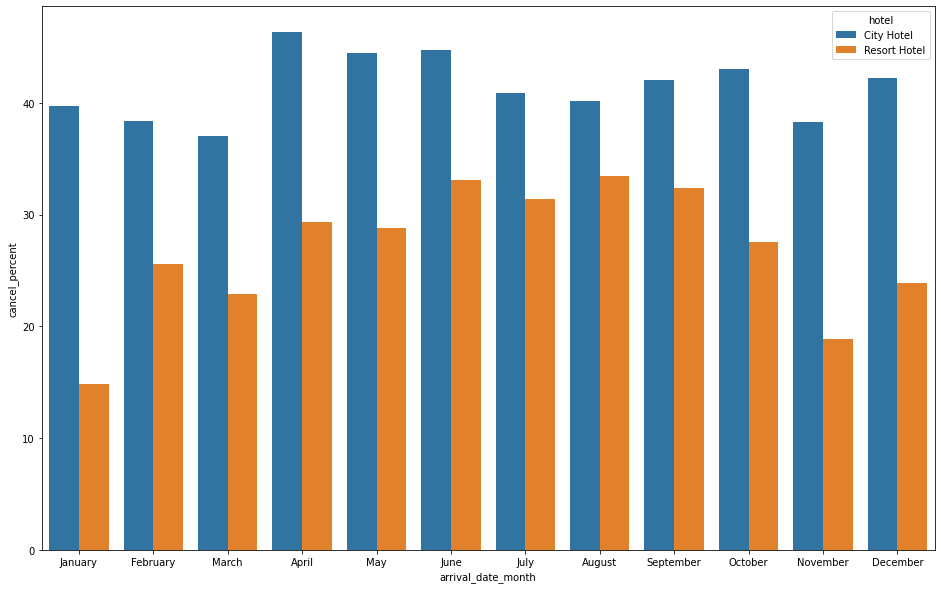

In [114]:
plt.figure(figsize=(16, 10))
sns.barplot(x = "arrival_date_month", y = "cancel_percent" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=cancelled_sorted)

- For the City hotel the relative number of cancelations is around 40 % throughout the year.
- For the Resort hotel it is highest in the summer and lowest during the winter.